In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [3]:
# Import functions from tensorflow_docs after installing it
!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-uc76o1pn
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-uc76o1pn
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=80412 sha256=9e7d622d72db98dc198d3eaff7f0e747d73a05fd73b53146157c35bbddd7cc64
  Stored in directory: /tmp/pip-ephem-wheel-cache-u8fhpd6u/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [0]:
# Download the daset with keras.utils.get_file
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

## Boston house prices dataset

#### Characteristics
* Number of Instances: 506
* The first 13 features are numeric/categorical predictive features. 
* The last one (attribute 14): Median Value is the target variable.

#### Attributes

1. CRIM per capita crime rate by town
2. ZN proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS proportion of non-retail business acres per town
4. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX nitric oxides concentration (parts per 10 million)
6. RM average number of rooms per dwelling
7. AGE proportion of owner-occupied units built prior to 1940
8. DIS weighted distances to five Boston employment centres
9. RAD index of accessibility to radial highways
10. TAX full-value property-tax rate per \$10,000
11. PTRATIO pupil-teacher ratio by town
12. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT \% lower status of the population
14. MEDV Median value of owner-occupied homes in \$1000’s [target attribute]

In [5]:
column_names = ['CRIM','ZN','INDUS','CHAS','NOX',
                'RM', 'AGE', 'DIS','RAD','TAX','PTRATION', 'B', 'LSTAT', 'MEDV']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
# Create a dataset instant
dataset = raw_dataset.copy()

# This function returns last n rows from the object 
# based on position.
dataset.tail(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


### Data processing (train/test split)

In [0]:
# Split data into train/test
# p = training data portion
p=0.8
trainDataset = dataset.sample(frac=p,random_state=0)
testDataset = dataset.drop(trainDataset.index)

## linear regression with one variable

Here, we desire to model the relationship between the dependent variable and the independent variable. In the linear regression with one variable, *we only have **one** independent variable*.

* Independent variable: 'RM'
* Dependend varaible: 'MEDV'

In a simple work, we want to **predict** the Median value of owner-occupied homes in $1000’s [target attribute] based on average number of rooms per dwelling (RM).

### Plot dependecy to one variable (linear regression with one variable)

Here we want to plot the MEDV against RM, i.e, visualize how MEDV is changed by changing RM. Basically we have $MEDV=f(RM)$ and we desire to estimate the function $f(.)$ using a linear regression.



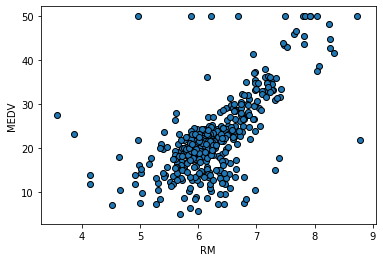

In [7]:
# Visual representation of training data
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# With .pop() command, the associated columns are extracted.
x = trainDataset['RM']
y = trainDataset['MEDV']
ax.scatter(x, y, edgecolors=(0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

### Split train/test data and labels for linear regression for one variable experiments

We can use two approach to access the columns:

1. **Pop command:** It returns item and drops it from frame. After using trainDataset.pop('RM'), the 'RM' column does not exist in the trainDataset frame anymore!
2. Using the **indexing with label**. Example trainDataset['RM']

We use approach **(2)**.

In [0]:
# Pop command return item and drop it from frame.
# After using trainDataset.pop('RM'), the 'RM' column 
# does not exist in the trainDataset frame anymore!
trainDataOne = trainDataset['RM']
trainLabelOne = trainDataset['MEDV']
testDataOne = testDataset['RM']
testLabelOne = testDataset['MEDV']

### Data normalization/standardization

*It is not needed for simple linear regression (linear regression with one variable).*

1. **Standardization**: Standardizing the features around the center and 0 with a standard deviation of 1. Assume we have features that have different units. So just becasue of the scaling do not contribute equally to the analysis and create misleading result. Formula: $\hat{X}=\frac{X-\mu}{\sigma}$

2. **Normalization**: Normalization aims to put the values of different features to a common scale (usually [0,1] or [-1,1]). This is used when features have different ranges but the same units. **Example**: Assume we have an RGB image. *Each channel has a different range but all channels have the same units: image pixel*! Formula: $\hat{X}=\frac{X-X_{min}}{X_{max}-X_{min}}$

### Create Model

1. The architecture of the model
2. Defining the optimizer
3. Compile the model and return the graph

In [9]:

model = keras.Sequential([
      layers.Dense(128, activation='relu', input_shape=(1,)),
      layers.Dense(128, activation='relu'),
      layers.Dense(1)
    ])

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.99, epsilon=1e-05, amsgrad=False,
    name='Adam')
  
  # Check: https://www.tensorflow.org/api_docs/python/tf/keras/Model
  # loss: String (name of objective function), objective function or tf.keras.losses.Loss instance. See tf.keras.losses.
  # optimizer: String (name of optimizer) or optimizer instance. See tf.keras.optimizers.
  # metrics: List of metrics to be evaluated by the model during training and testing
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               256       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 16,897
Trainable params: 16,897
Non-trainable params: 0
_________________________________________________________________


### Training
Fit the model to the data

* n_epochs: number of epochs
* validation_split: keep a portion of training data for unbiased validation
* vebore: set to 0 as we want a short summary and not all the details!!
* callbacks: A callback is a tool to customize the behavior of a the model during training, testing, etc.

In [10]:
# A mechanism that stops training if the validation loss is not improving for more than n_idle_epochs.
#See https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping for details.
n_idle_epochs = 100
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=n_idle_epochs, min_delta=0.1)

n_epochs = 2000
history = model.fit(
  trainDataOne, trainLabelOne,
  epochs=n_epochs, validation_split = 0.1, verbose=0,
  callbacks=[earlyStopping,tfdocs.modeling.EpochDots()])


Epoch: 0, loss:545.0366,  mae:21.6368,  mse:545.0366,  val_loss:560.0960,  val_mae:21.3364,  val_mse:560.0959,  
....................................................................................................
Epoch: 100, loss:47.8348,  mae:4.8585,  mse:47.8348,  val_loss:87.8931,  val_mae:6.3770,  val_mse:87.8931,  
....................................................................................................
Epoch: 200, loss:38.6434,  mae:4.3475,  mse:38.6434,  val_loss:76.0311,  val_mae:5.3921,  val_mse:76.0311,  
....................................................................................................
Epoch: 300, loss:36.8273,  mae:4.1541,  mse:36.8273,  val_loss:71.5804,  val_mae:5.0611,  val_mse:71.5804,  
....................................................................................................
Epoch: 400, loss:36.1383,  mae:4.1833,  mse:36.1384,  val_loss:71.4148,  val_mae:5.0414,  val_mse:71.4148,  
..............................................

Text(0, 0.5, 'MEDV')

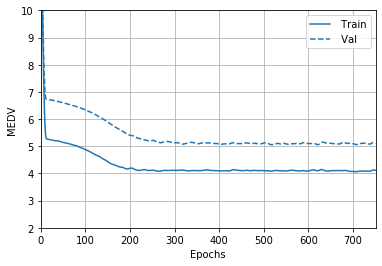

In [11]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'': history}, metric = "mae")
plt.ylim([2, 10])
plt.ylabel('MEDV')

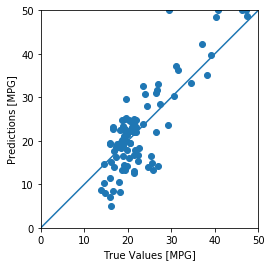

In [12]:
predictions = model.predict(testDataOne).flatten()
a = plt.axes(aspect='equal')
plt.scatter(predictions, testLabelOne)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)